# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Nurul Fatimah
- Email: nurulfatimahnurul31@gmail.com
- Id Dicoding: nurulftmh

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Menyiapkan data yang akan diguankan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = '/content/drive/My Drive/dataset/employee_data.csv'
df = pd.read_csv(df)
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


## Data Understanding

In [4]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Dataset terdiri dari 1470 baris dan 35 kolom. Kolom dari dataset tersebut, diantaranya:

- EmployeeId – ID unik karyawan

- Attrition – Apakah karyawan keluar dari perusahaan? (0 = tidak, 1 = ya)

- Age – Usia karyawan

- BusinessTravel – Frekuensi perjalanan dinas dalam pekerjaan

- DailyRate – Gaji harian

- Department – Departemen tempat karyawan bekerja

- DistanceFromHome – Jarak dari rumah ke tempat kerja (dalam kilometer)

- Education – Tingkat pendidikan (1 = Di bawah kuliah, 2 = Kuliah, 3 = Sarjana, 4 = Magister, 5 = Doktor)

- EducationField – Bidang pendidikan

- EnvironmentSatisfaction – Tingkat kepuasan terhadap lingkungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)

- Gender – Jenis kelamin karyawan

- HourlyRate – Gaji per jam

- JobInvolvement – Tingkat keterlibatan dalam pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)

- JobLevel – Level jabatan (1 sampai 5)

- JobRole – Jabatan karyawan

- JobSatisfaction – Tingkat kepuasan terhadap pekerjaan (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)

- MaritalStatus – Status pernikahan

- MonthlyIncome – Gaji bulanan

- MonthlyRate – Tarif bulanan

- NumCompaniesWorked – Jumlah perusahaan tempat karyawan pernah bekerja

- Over18 – Apakah usia di atas 18 tahun?

- OverTime – Apakah karyawan bekerja lembur?

- PercentSalaryHike – Persentase kenaikan gaji dalam satu tahun terakhir

- PerformanceRating – Penilaian kinerja (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)

- RelationshipSatisfaction – Tingkat kepuasan terhadap hubungan kerja (1 = Rendah, 2 = Sedang, 3 = Tinggi, 4 = Sangat Tinggi)

- StandardHours – Jam kerja standar

- StockOptionLevel – Level opsi saham yang dimiliki

- TotalWorkingYears – Total tahun pengalaman kerja

- TrainingTimesLastYear – Jumlah pelatihan yang diikuti tahun lalu

- WorkLifeBalance – Keseimbangan antara kerja dan kehidupan pribadi (1 = Rendah, 2 = Baik, 3 = Sangat Baik, 4 = Luar Biasa)

- YearsAtCompany – Jumlah tahun bekerja di perusahaan saat ini

- YearsInCurrentRole – Jumlah tahun di posisi/jabatan saat ini

- YearsSinceLastPromotion – Jumlah tahun sejak promosi terakhir

- YearsWithCurrManager – Jumlah tahun bekerja dengan manajer saat ini

## Data Preparation / Preprocessing

In [6]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [7]:
#Menghapus Missing Value
df = df.dropna()

In [8]:
#Cek duplikat
df.duplicated().sum()

np.int64(0)

In [9]:
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,...,1,80,0,10,2,2,10,7,1,9
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [10]:
df.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058,1058.000000,1058,1058.000000,1058.000000,1058,1058.0,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,746,NaN,701,NaN,NaN,436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,736.656900,37.055766,0.169187,NaN,809.542533,NaN,8.978261,2.879017,NaN,1.0,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,NaN,408.478049,NaN,8.040608,1.031442,NaN,0.0,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,NaN,465.250000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,NaN,817.500000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,NaN,1168.500000,NaN,13.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000


In [11]:
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'JobRole', 'Over18', 'OverTime']
numerical_features = ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',  'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

print(len(categorical_features), len(numerical_features))

8 24


<ipython-input-12-0794276d331f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


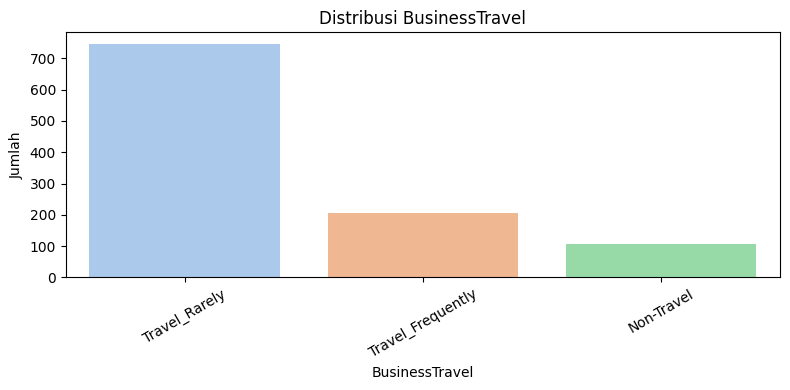

<ipython-input-12-0794276d331f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


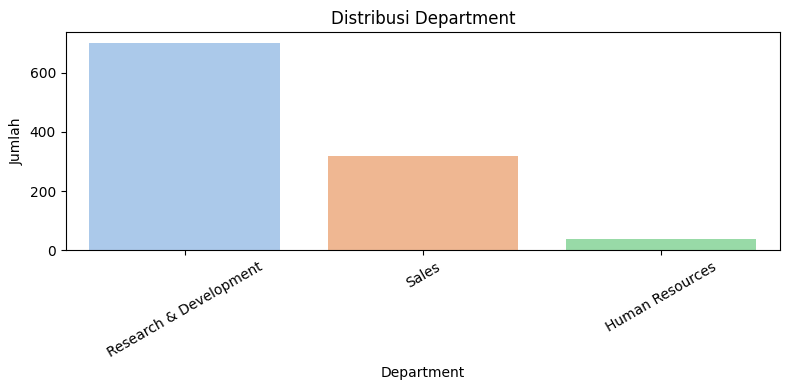

<ipython-input-12-0794276d331f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


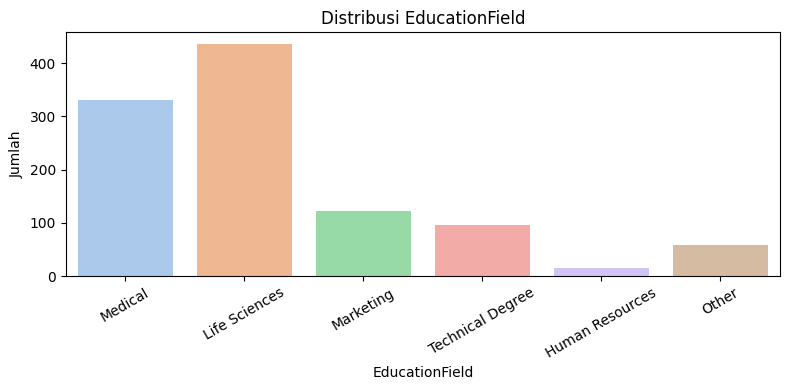

<ipython-input-12-0794276d331f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


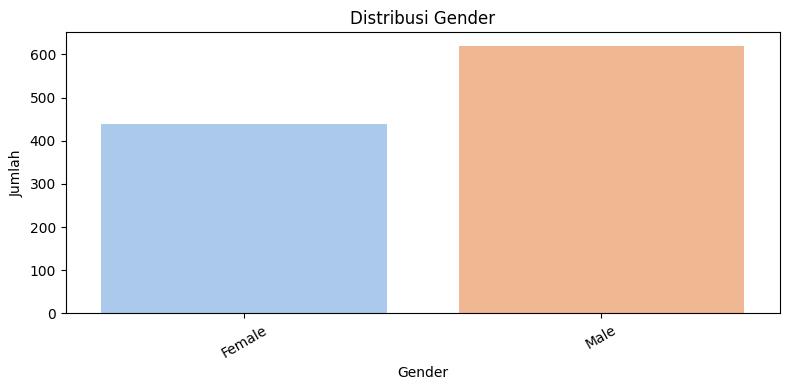

<ipython-input-12-0794276d331f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


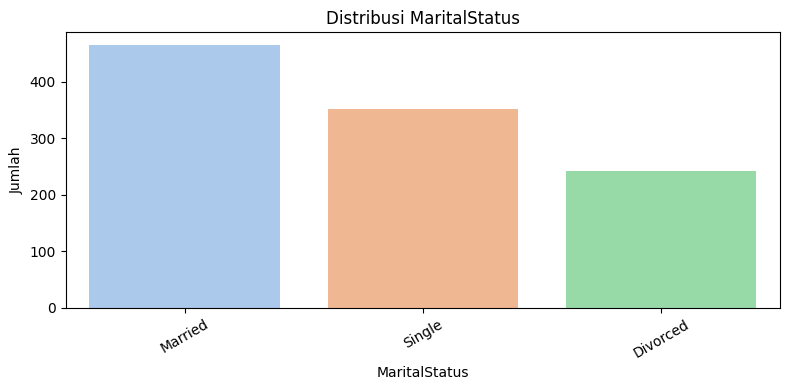

<ipython-input-12-0794276d331f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


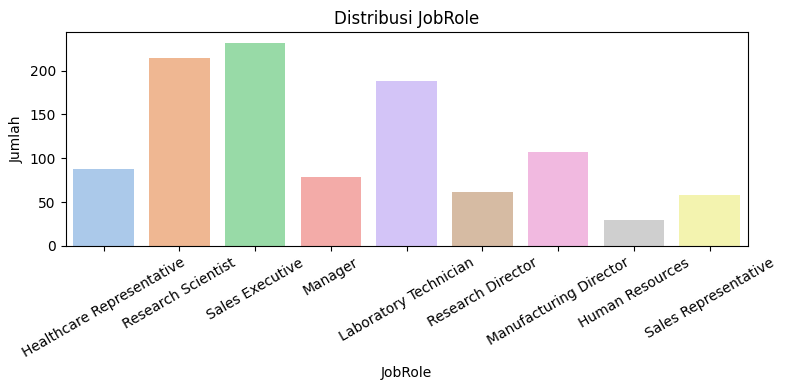

<ipython-input-12-0794276d331f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


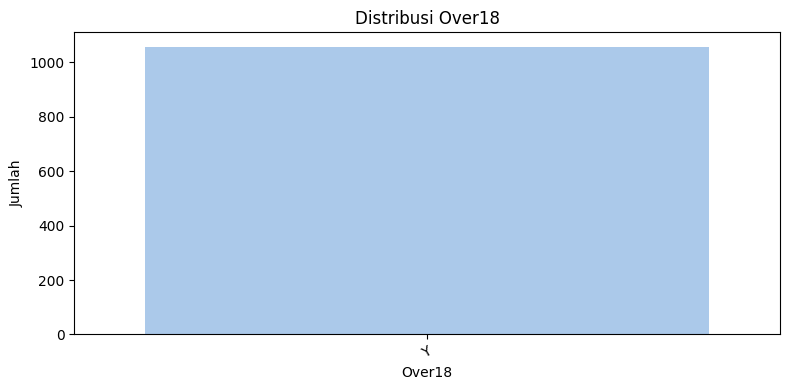

<ipython-input-12-0794276d331f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


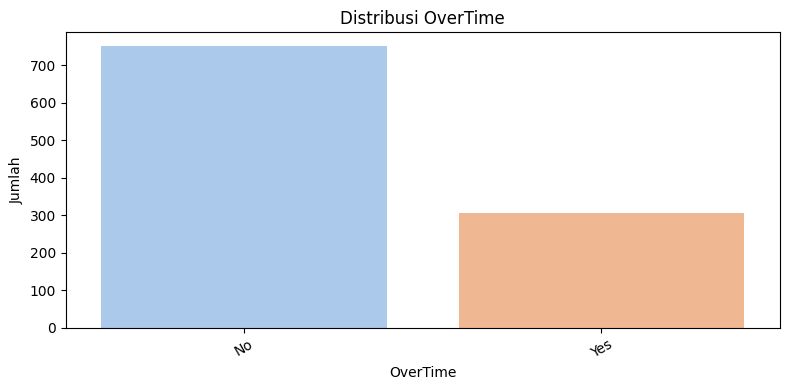

In [12]:
# 1. Univariate analysis: Categorical features
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

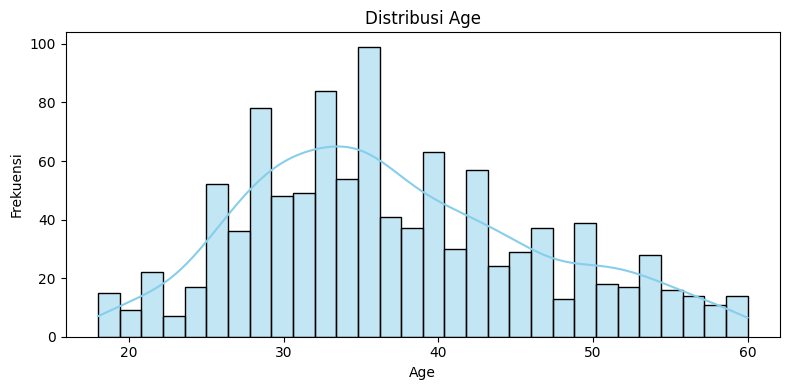

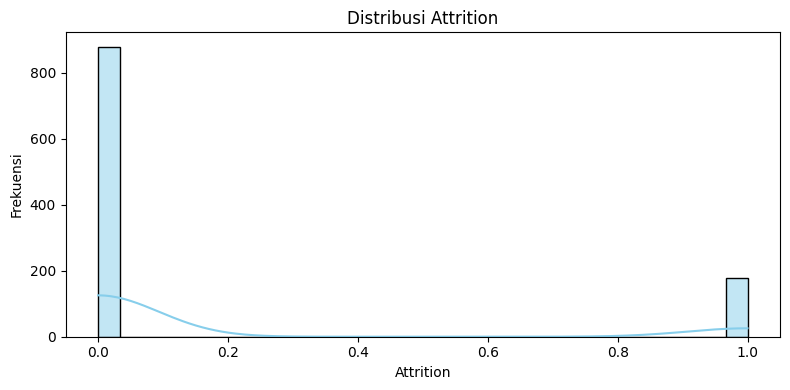

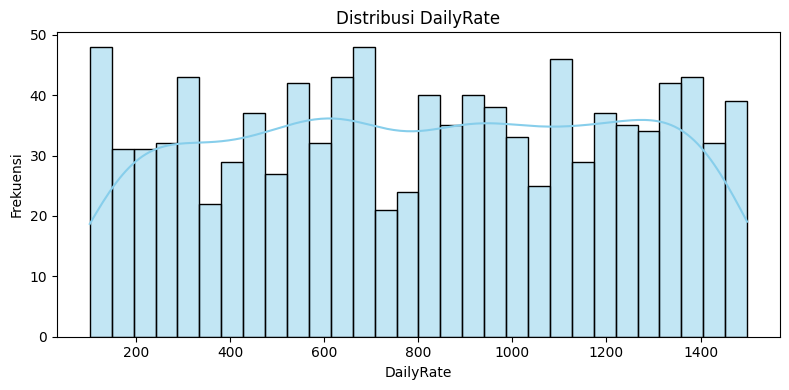

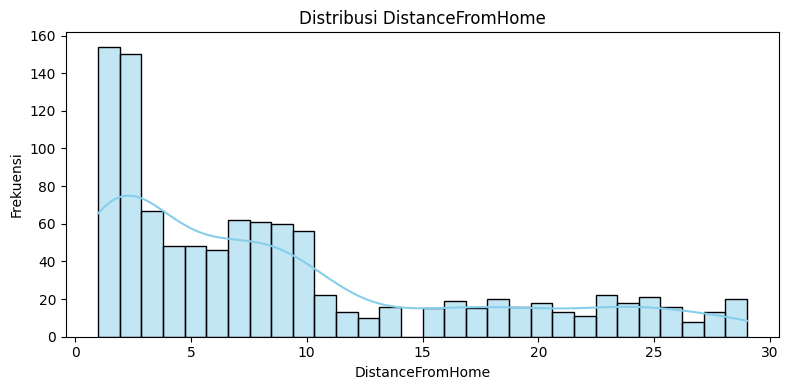

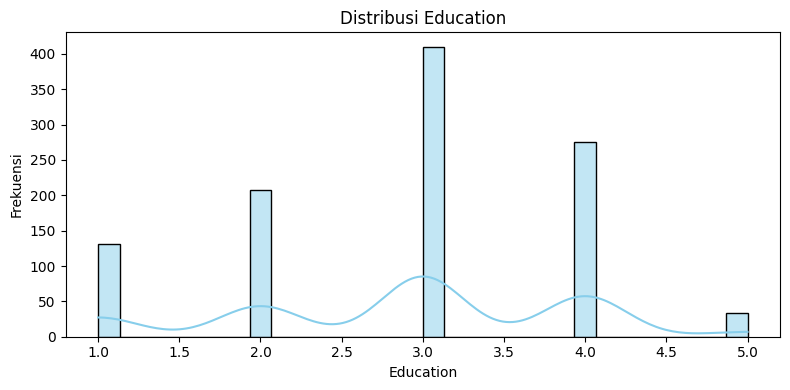

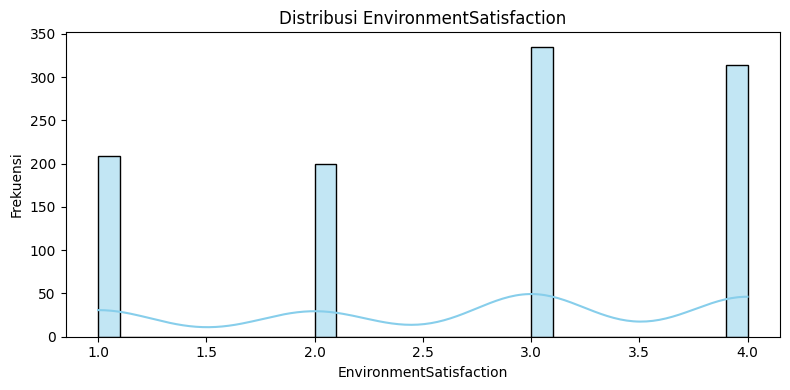

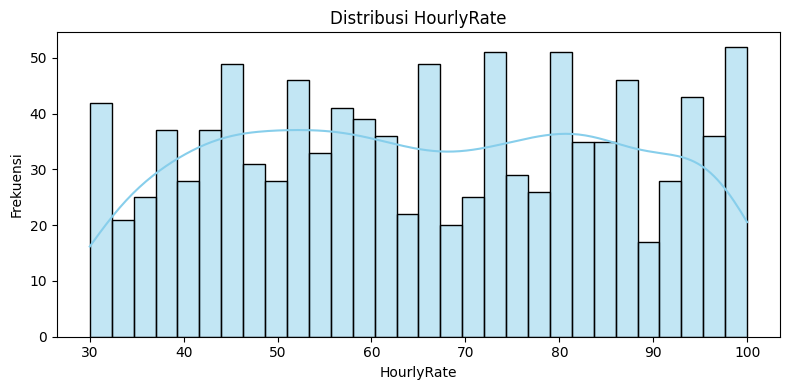

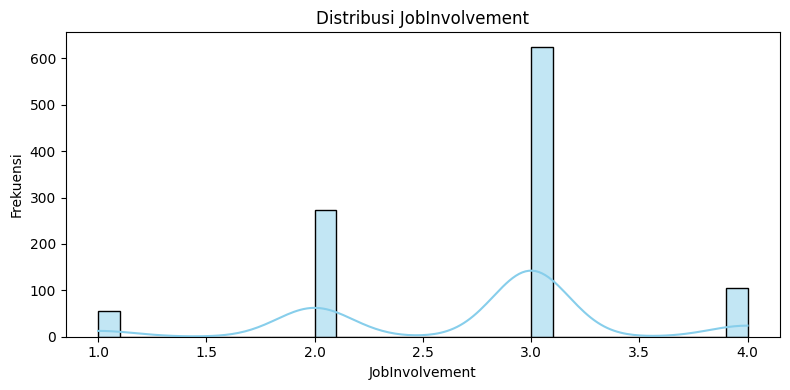

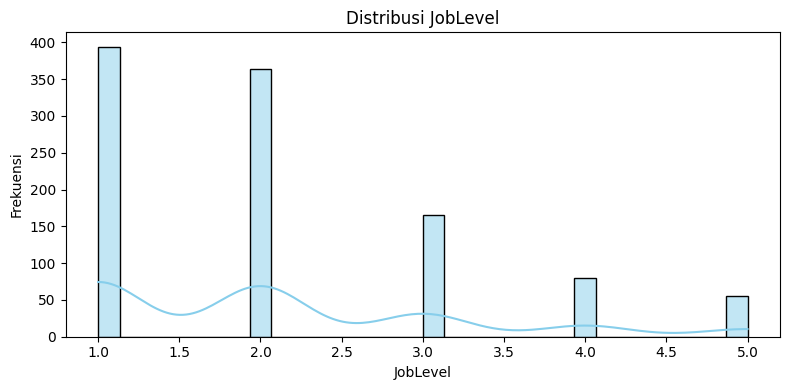

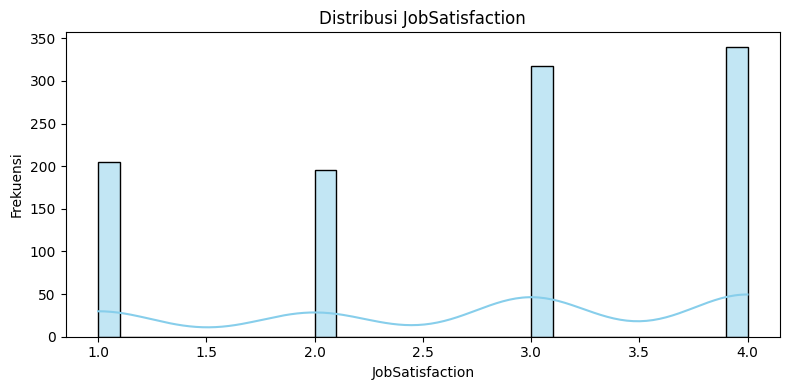

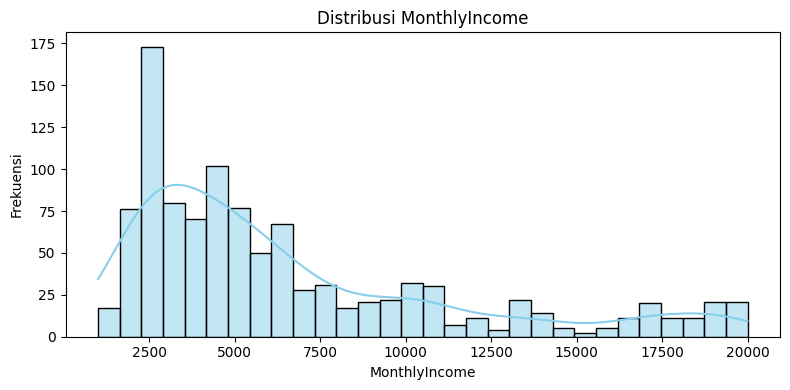

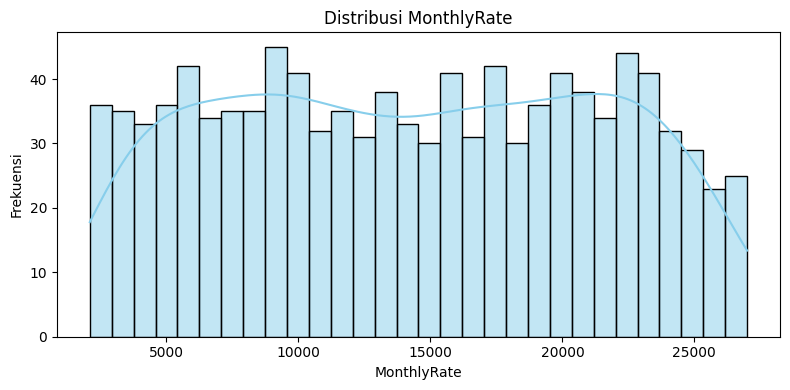

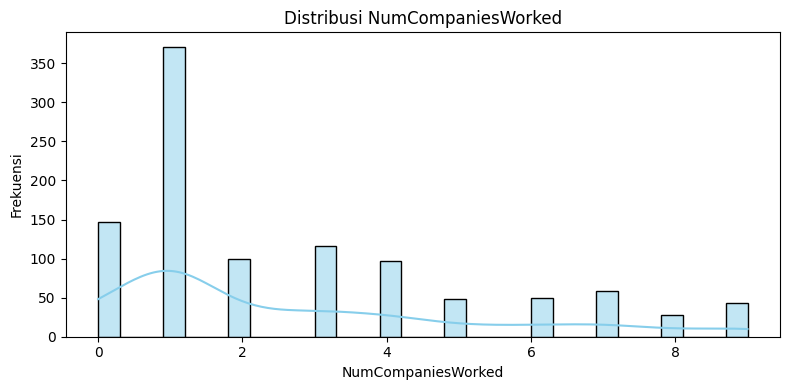

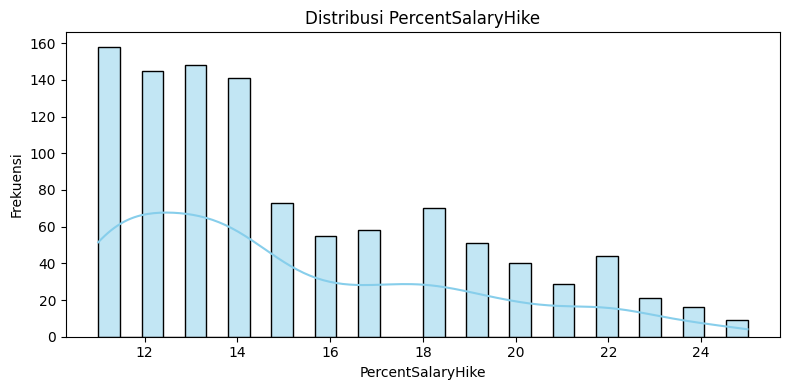

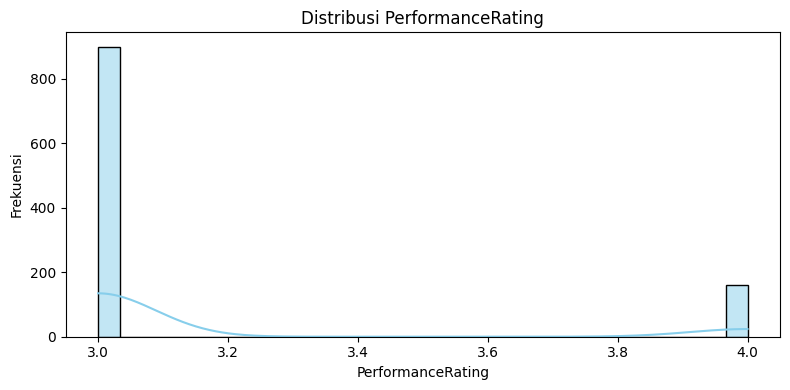

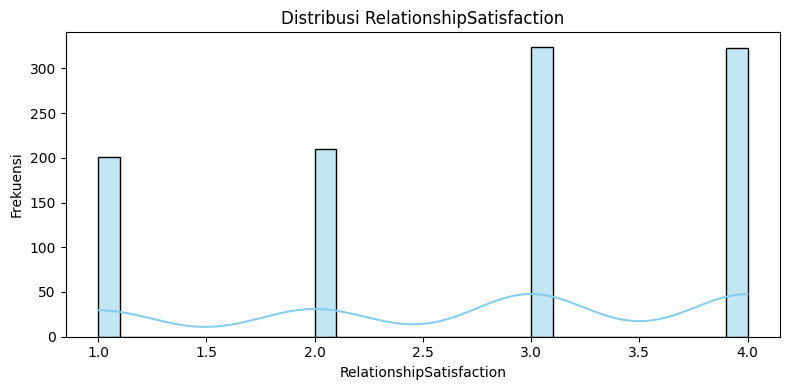

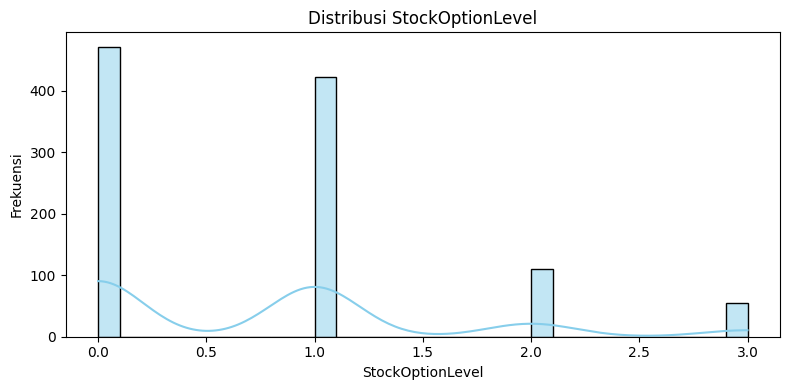

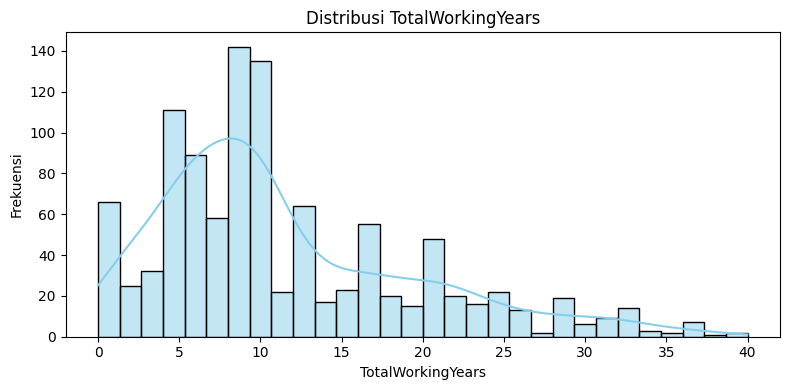

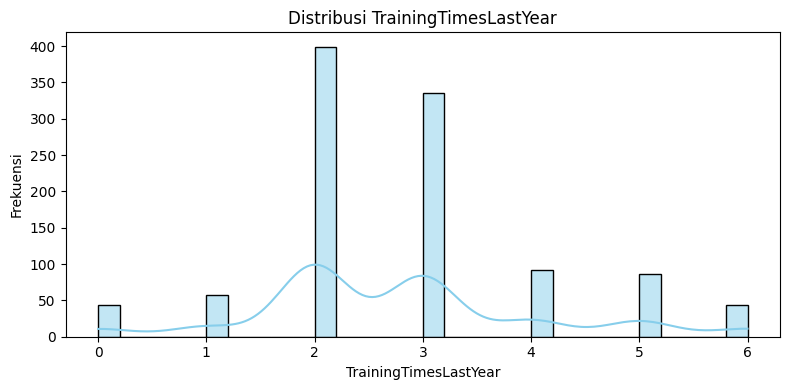

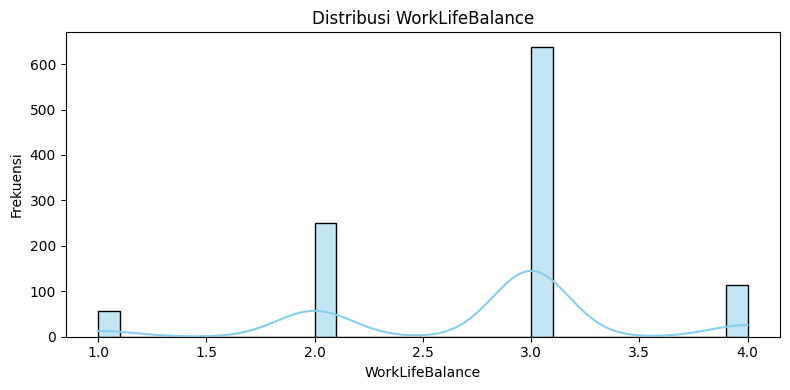

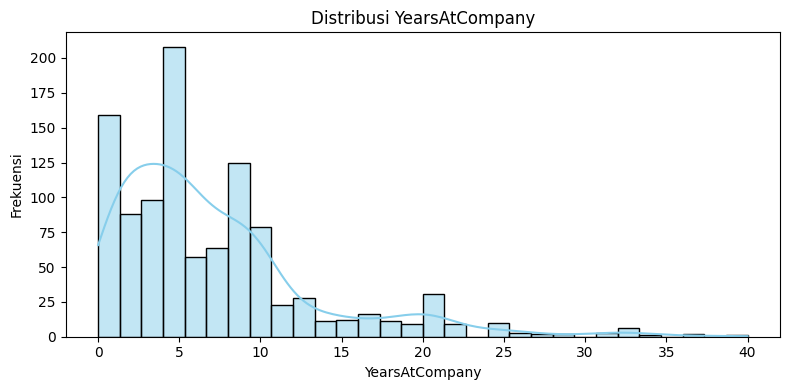

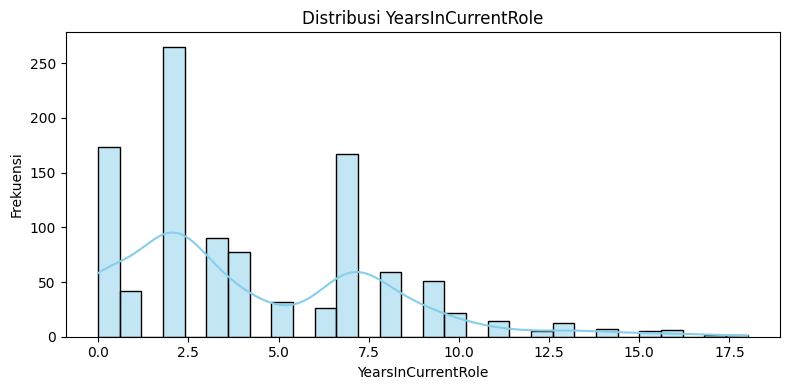

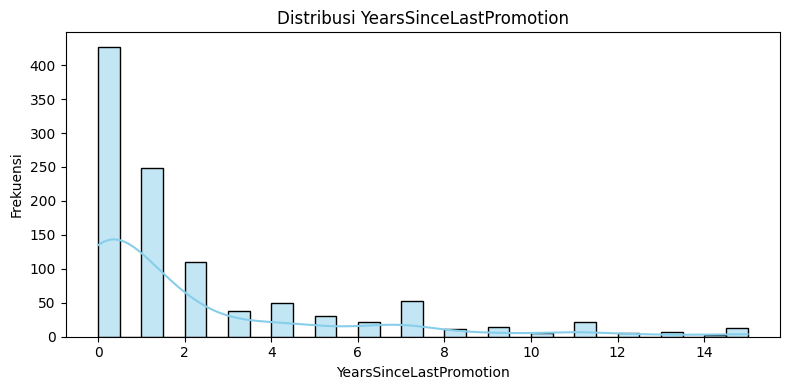

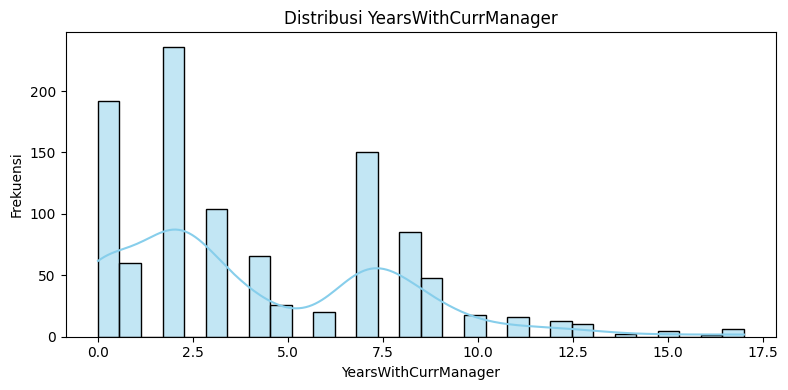

In [13]:
# 2. Univariate analysis: Numerical features
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

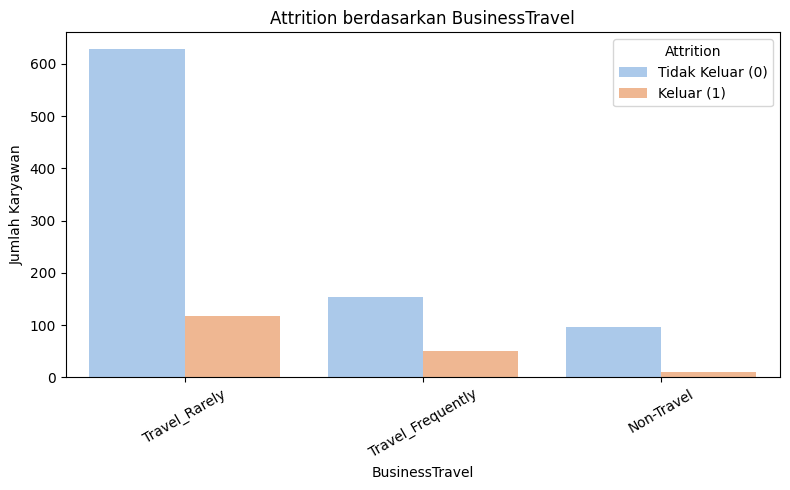

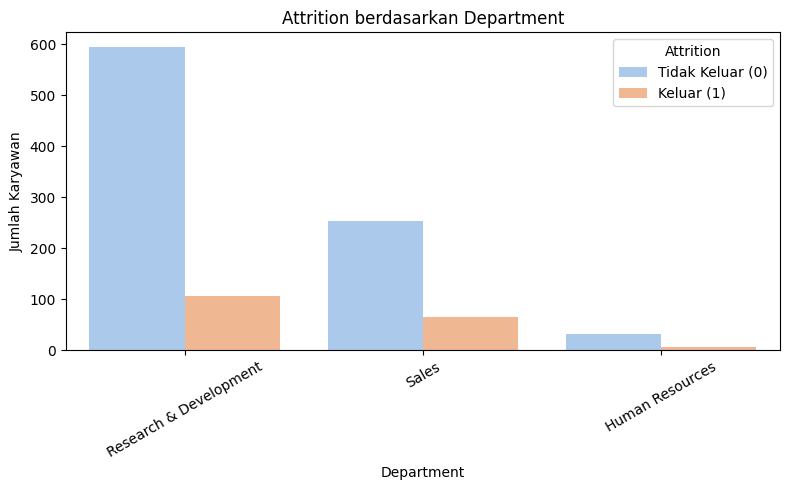

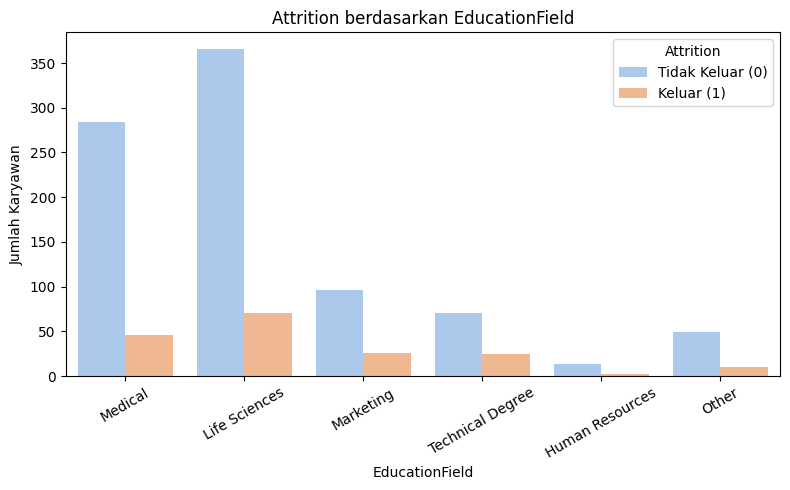

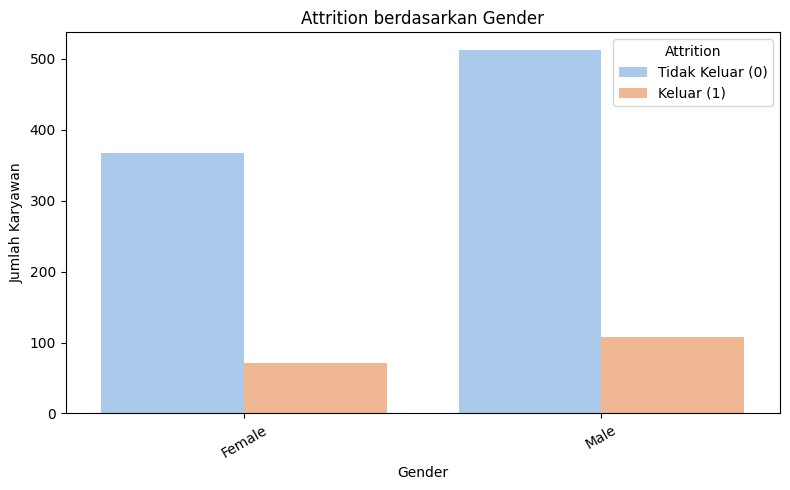

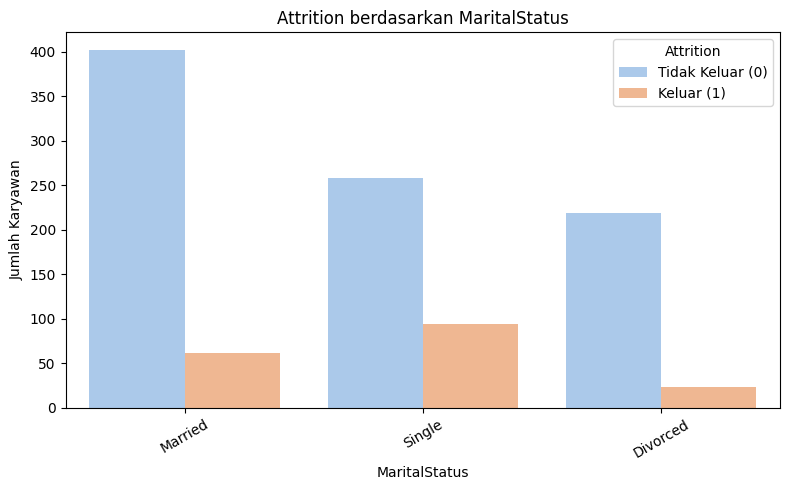

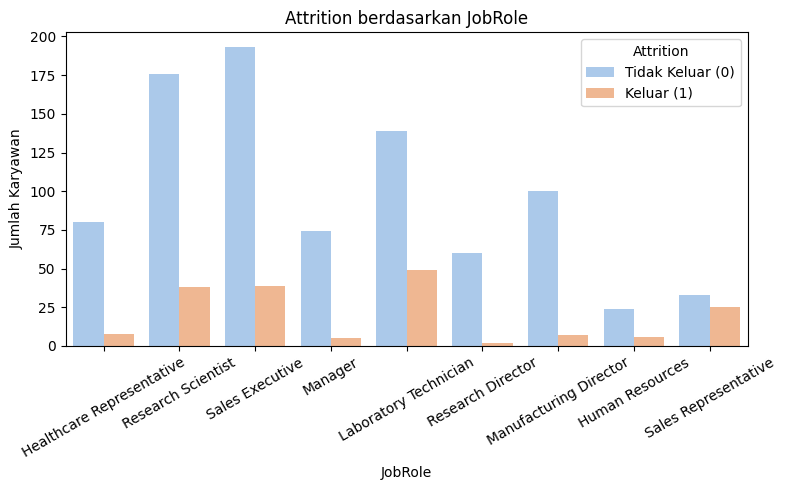

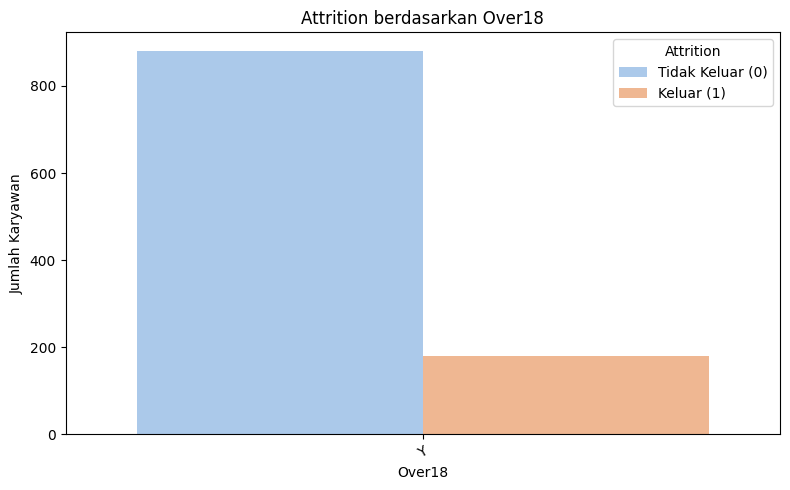

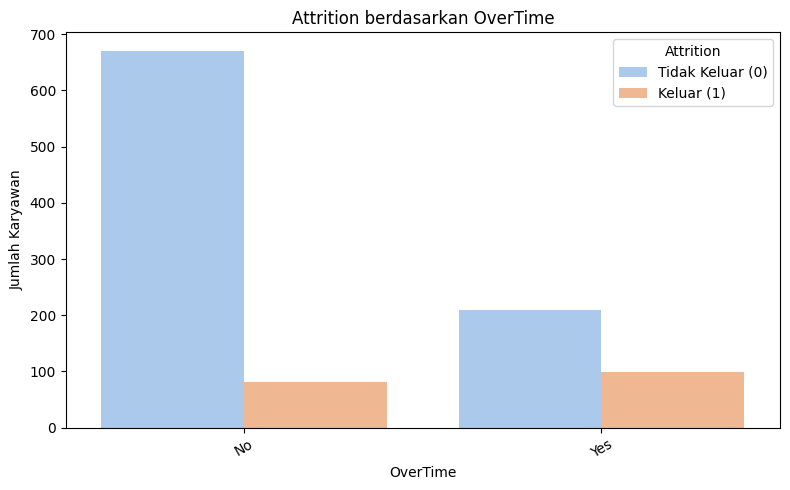

In [14]:
#Multivariate Analysis
for col in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Attrition', palette='pastel')
    plt.title(f'Attrition berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah Karyawan')
    plt.xticks(rotation=30)
    plt.legend(title='Attrition', labels=['Tidak Keluar (0)', 'Keluar (1)'])
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Korelasi Fitur Numerik')

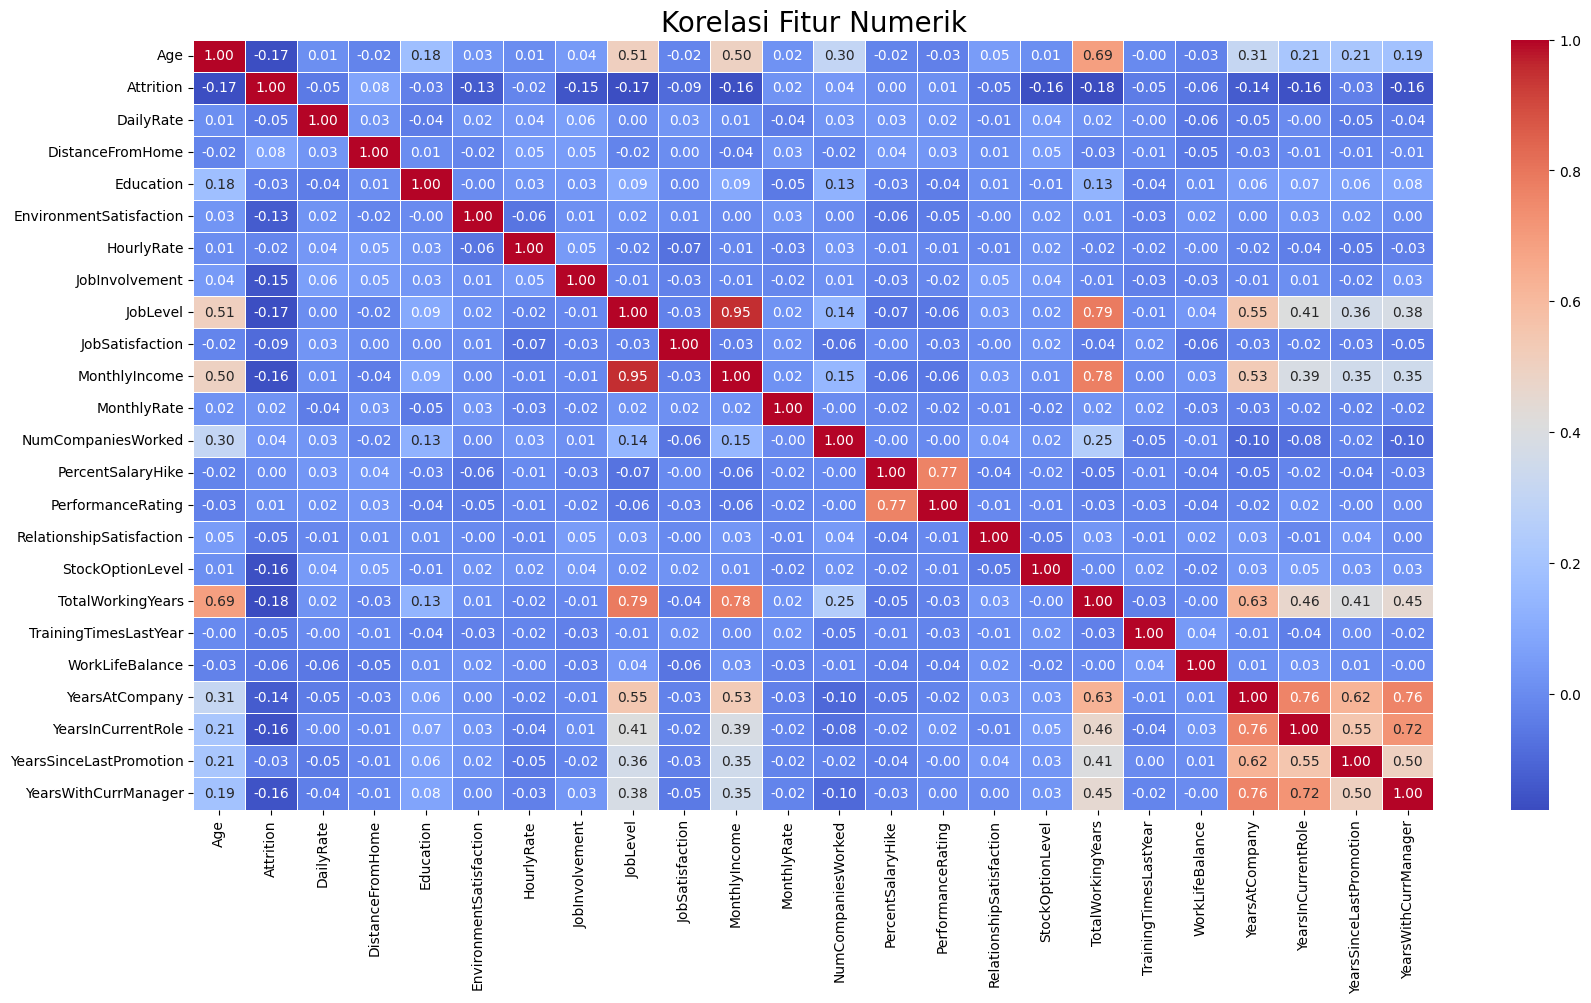

In [15]:
#Heatmap Nilai Korelasi
plt.figure(figsize=(20, 10))
sns.heatmap(data=df[numerical_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Korelasi Fitur Numerik", size=20)

In [16]:
df_fix = df.copy()

In [17]:
df_fix['Attrition'] = df_fix['Attrition'].astype(int)

In [18]:
#Hapus kolom yang tidak dipakai
df_fix.drop(columns=['EmployeeId', 'EmployeeCount', 'StandardHours', 'Over18'], inplace=True)

In [19]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EnvironmentSatisfaction   1058 non-null   int64 
 9   Gender                    1058 non-null   object
 10  HourlyRate                1058 non-null   int64 
 11  JobInvolvement            1058 non-null   int64 
 12  JobLevel                  1058 non-null   int64 
 13  JobRole                   1058 non-null   object
 14  JobSatisfaction           105

In [20]:
#Encoding untuk fitur kategorikal
cat_cols = df_fix.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df_fix[col] = le.fit_transform(df_fix[col])

In [21]:
df_fix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1,2,1141,1,11,2,3,1,0,...,3,1,0,15,2,1,1,0,0,0
2,51,1,2,1323,1,4,4,1,1,1,...,3,3,3,18,2,4,10,0,2,7
3,42,0,1,555,2,26,3,2,3,0,...,3,4,1,23,2,4,20,4,4,8
6,40,0,2,1124,2,1,2,3,2,1,...,4,3,3,6,2,2,4,3,0,2
7,55,1,2,725,1,2,3,3,4,1,...,3,4,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,28,1,0,1366,1,24,2,5,2,1,...,3,1,0,10,2,2,10,7,1,9
1465,38,0,2,168,1,1,3,1,3,0,...,3,4,0,10,4,4,1,0,0,0
1467,28,1,2,1485,1,12,1,1,3,0,...,3,4,0,1,4,2,1,1,0,0
1468,40,0,0,458,1,16,2,1,3,1,...,3,2,1,6,0,3,4,2,0,0


In [22]:
df_fix.to_csv('df_fix.csv', index=False)

In [23]:
#Pisahkan fitur dan label
X = df_fix.drop('Attrition', axis=1)
y = df_fix['Attrition']

In [24]:
#Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Modeling

In [25]:
#Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
print(f"Total data latih : {len(X_train)}")
print(f"Total data uji : {len(X_test)}")

Total data latih : 846
Total data uji : 212


In [27]:
#Modelling dengan Logistic Regression
print("\n#Modelling dengan Logistic Regression")
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)


#Modelling dengan Logistic Regression


LogisticRegression(max_iter=1000, random_state=42)

In [28]:
y_pred = model.predict(X_test)

## Evaluation


#Akurasi
Akurasi : 0.86

#Classification report
Classification Report:
               precision    recall  f1-score   support

Tidak Keluar       0.89      0.94      0.92       176
      Keluar       0.62      0.44      0.52        36

    accuracy                           0.86       212
   macro avg       0.75      0.69      0.72       212
weighted avg       0.85      0.86      0.85       212


#Confusion matrix


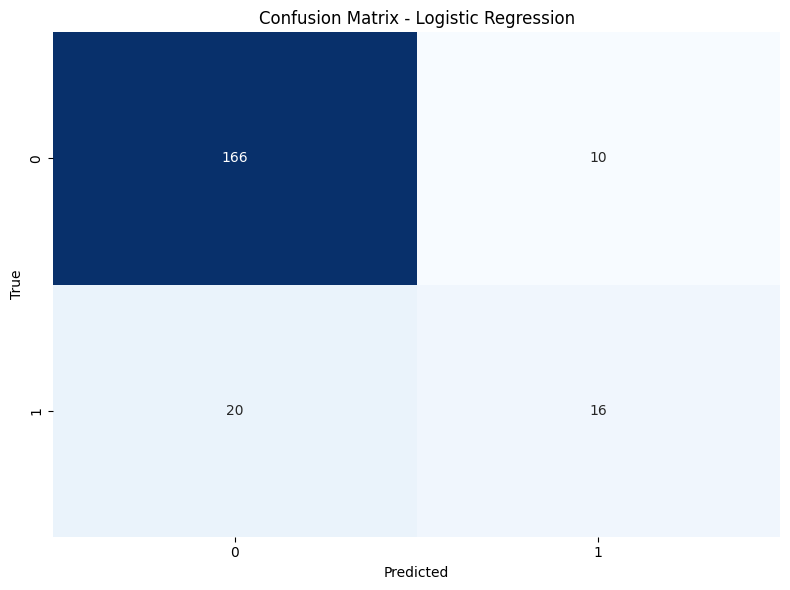

In [29]:
#Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\n#Akurasi")
print(f"Akurasi : {accuracy:.2f}")

#Classification report
print(f"\n#Classification report")
class_report = classification_report(y_test, y_pred, target_names=["Tidak Keluar", "Keluar"])
print("Classification Report:\n", class_report)

#Confusion matrix
print(f"\n#Confusion matrix")
conf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

In [30]:
print("\nMenyimpan model...")
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model disimpan sebagai 'logistic_regression_model.pkl'")
print("Scaler disimpan sebagai 'scaler.pkl'")


Menyimpan model...
Model disimpan sebagai 'logistic_regression_model.pkl'
Scaler disimpan sebagai 'scaler.pkl'


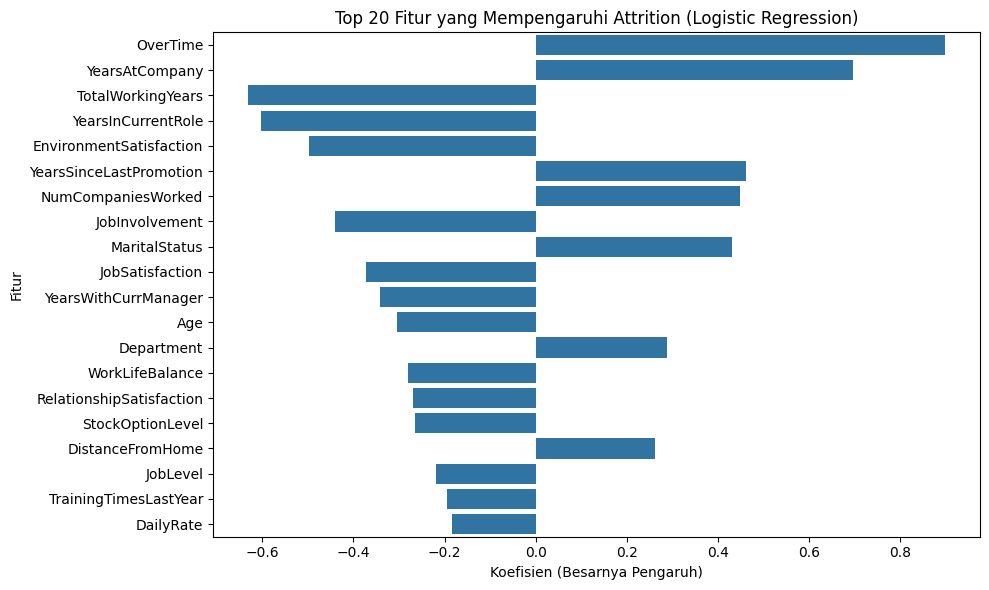

In [35]:
#Mengambil koefisien dari model Logistic Regression
coefficients = pd.Series(model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)

#Plot 20 fitur paling berpengaruh (dalam hal besarnya koefisien)
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients[:20], y=coefficients.index[:20])
plt.title("Top 20 Fitur yang Mempengaruhi Attrition (Logistic Regression)")
plt.xlabel("Koefisien (Besarnya Pengaruh)")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()


###Testing

In [32]:
data_to_predict = {
    'Age': 25,
    'BusinessTravel': 'Travel_Frequently',
    'DailyRate': 1342,
    'Department': 'Human Resources',
    'DistanceFromHome': 1,
    'Education': 3,
    'EducationField': 'Other',
    'EnvironmentSatisfaction': 3,
    'Gender': 1,
    'HourlyRate': 78,
    'JobInvolvement': 3,
    'JobLevel': 1,
    'JobRole': 'Human Resources',
    'JobSatisfaction': 2,
    'MaritalStatus': 'Married',
    'MonthlyIncome': 2983,
    'MonthlyRate': 6234,
    'NumCompaniesWorked': 0,
    'OverTime': 1,
    'PercentSalaryHike': 10,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 3,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 7,
    'TrainingTimesLastYear': 2,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 4,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 3,
    'YearsWithCurrManager': 1,
}

In [34]:
def predict_attrition(employee_data, model_path='logistic_regression_model.pkl', scaler_path='scaler.pkl'):

    #Load model dan scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    #Convert ke DataFrame
    df = pd.DataFrame(employee_data, index=[0])

    #Encoding
    encoding_maps = {
        'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2},
        'Department': {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2},
        'EducationField': {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5},
        'JobRole': {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8},
        'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2}
    }

    for col, mapping in encoding_maps.items():
        if col in df.columns:
            if df[col].iloc[0] in mapping:
                df[col] = mapping[df[col].iloc[0]]
            else:
                df[col] = 0

    #Normalisasi
    df_scaled = scaler.transform(df)

    #Prediksi
    prediction = model.predict(df_scaled)[0]
    probabilities = model.predict_proba(df_scaled)[0]

    return {
        'prediction': int(prediction),
        'probability_no_attrition': float(probabilities[0]),
        'probability_attrition': float(probabilities[1]),
        'confidence': float(max(probabilities)),
        'risk_level': 'HIGH' if probabilities[1] > 0.7 else 'MEDIUM' if probabilities[1] > 0.4 else 'LOW'
    }

# Test fungsi
print("Testing fungsi prediksi:")
result = predict_attrition(data_to_predict)
print(f"Hasil: {result}")

Testing fungsi prediksi:
Hasil: {'prediction': 0, 'probability_no_attrition': 0.6996190179807609, 'probability_attrition': 0.30038098201923913, 'confidence': 0.6996190179807609, 'risk_level': 'LOW'}


In [38]:
pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.7.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.7
ale-py==0.11.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.5.19.0.38.36
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.4.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.3.3
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.4.26
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
clarabel==0.10.0
click==8.2.1
cloudpathlib==0.21.1
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet